<a href="https://colab.research.google.com/github/rizalkl/Python_codes/blob/main/Forecasting_with_Prophet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello This is the start
We shall begin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
from fbprophet import Prophet

In [54]:
df = pd.read_csv('/content/Supply chain forecast data.csv')


In [56]:
df['Date'] = pd.date_range('2016-01-01','2020-12-01', 
              freq='MS').strftime("%Y-%b").tolist()

In [57]:
df.drop(['Period'], axis=1, inplace=True)

In [58]:
df.columns = ['y', 'ds']

In [60]:
df["y"] = [float(str(i).replace(",", "")) for i in df["y"]]

In [61]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [62]:
df.head()

,y,ds
0,2000.0,2016-Jan
1,3000.0,2016-Feb
2,3000.0,2016-Mar
3,3000.0,2016-Apr
4,4000.0,2016-May


In [63]:
future = m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,347.414187,-1288.530841,5190.857828,347.414187,347.414187,1689.744560,1689.744560,1689.744560,5577.2088,5577.2088,5577.2088,-3887.464239,-3887.464239,-3887.464239,0.0,0.0,0.0,2037.158748
1,2016-02-01,415.015256,-1767.282109,4207.615105,415.015256,415.015256,882.888510,882.888510,882.888510,5577.2088,5577.2088,5577.2088,-4694.320290,-4694.320290,-4694.320290,0.0,0.0,0.0,1297.903766
2,2016-03-01,478.254966,-1502.188684,4366.887267,478.254966,478.254966,773.756783,773.756783,773.756783,5577.2088,5577.2088,5577.2088,-4803.452017,-4803.452017,-4803.452017,0.0,0.0,0.0,1252.011749
3,2016-04-01,545.856035,-1552.268192,4546.924995,545.856035,545.856035,1011.789553,1011.789553,1011.789553,5577.2088,5577.2088,5577.2088,-4565.419247,-4565.419247,-4565.419247,0.0,0.0,0.0,1557.645587
4,2016-05-01,611.276424,862.356837,7120.495522,611.276424,611.276424,3347.898935,3347.898935,3347.898935,5577.2088,5577.2088,5577.2088,-2229.309864,-2229.309864,-2229.309864,0.0,0.0,0.0,3959.175359


In [64]:
filtered = forecast[['ds', 'yhat']]
filtered.tail(12)

,ds,yhat
60,2020-12-31,6194.003801
61,2021-01-31,4694.892696
62,2021-02-28,8387.687976
63,2021-03-31,4831.672887
64,2021-04-30,5654.783694
65,2021-05-31,8325.353166
66,2021-06-30,9970.683110
67,2021-07-31,16068.337979
68,2021-08-31,15093.967609
69,2021-09-30,14524.720783


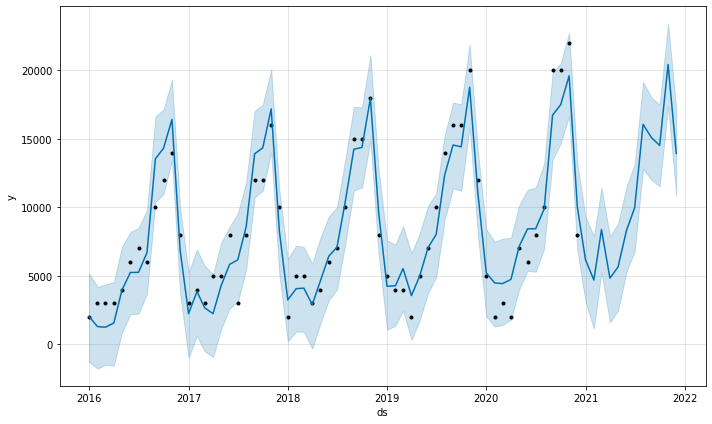

In [65]:
plot1 = m.plot(forecast)

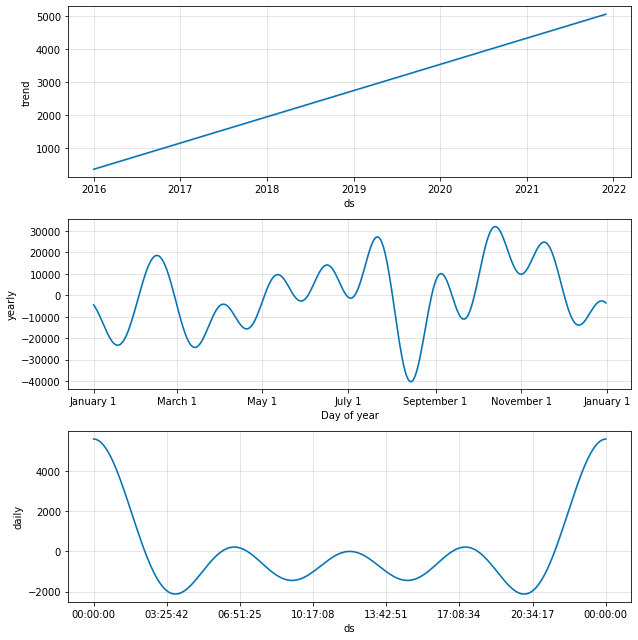

In [66]:
plt2 = m.plot_components(forecast)

In [74]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model = m, initial = '48 m', horizon = '365 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2016-06-02 12:00:00 and 2019-12-02 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [75]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-07-01,42232.210768,42232.210751,42232.210784,7000.0,2016-06-02 12:00:00
1,2016-08-01,27335.899815,27335.899763,27335.899869,6000.0,2016-06-02 12:00:00
2,2016-09-01,5924.424573,5924.424477,5924.424674,10000.0,2016-06-02 12:00:00
3,2016-10-01,100717.224162,100717.224024,100717.224307,12000.0,2016-06-02 12:00:00
4,2016-11-01,12057.381036,12057.380851,12057.381237,14000.0,2016-06-02 12:00:00


In [77]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,59 days 12:00:00,6.998791e+08,26455.229049,13431.532904,3.733097,0.265181,0.333333
1,61 days 00:00:00,2.128939e+08,14590.883490,7042.996250,1.788676,0.455293,0.166667
2,89 days 00:00:00,5.095978e+07,7138.611799,5027.692625,1.340011,0.798518,0.166667
3,90 days 00:00:00,3.870041e+07,6220.965212,4573.657914,1.328207,0.923478,0.138889
4,90 days 12:00:00,2.210999e+07,4702.126402,3277.066130,0.856057,0.407558,0.333333
5,120 days 00:00:00,1.425928e+08,11941.220764,6631.043881,1.567019,0.798518,0.259259
6,120 days 12:00:00,1.012855e+09,31825.385724,16105.209885,2.130502,0.407558,0.111111
7,121 days 00:00:00,1.014810e+09,31856.078274,16442.253425,2.379402,1.646846,0.055556
8,150 days 00:00:00,9.949367e+08,31542.617775,16455.898320,2.293112,1.708224,0.111111
9,151 days 00:00:00,9.503665e+08,30828.015286,14837.998655,1.892878,0.321790,0.222222


In [80]:
forecast.to_csv('content')

